# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Randy Dani Prabawa]
- **Email:** [randy.dani29@gmail.com]
- **ID Dicoding:** randydani

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
7. Bagaimana pertumbuhan seller dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install pipreqs

In [2]:
!pip install -q streamlit

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

In [6]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Demo" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/Demo/requirements.txt


## Data Wrangling

### Gathering Data

##### Customer Dataset

In [ ]:
#https://drive.google.com/file/d/1KqXWztTBB6X6ACOYNWsx8rT5aRjQpZEp/view?usp=sharing
id = '1KqXWztTBB6X6ACOYNWsx8rT5aRjQpZEp'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'customer_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1KqXWztTBB6X6ACOYNWsx8rT5aRjQpZEp
To: /content/customer_df.csv
100%|██████████| 9.03M/9.03M [00:00<00:00, 38.2MB/s]


In [ ]:
customer_df=pd.read_csv('customer_df.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Setiap customer memiliki kode unik yaitu customer_unique_id
- customer_city dan customer_state merupakan tempat tinggal pelanggan
- customer_zip_code_prefix menunjukkan kode setiap daerah

#### Geolocation Dataset

In [ ]:
#https://drive.google.com/file/d/1bVqBrVO9aPi_7PLzP0YE6lFMTQyl02xB/view?usp=sharing
id = '1bVqBrVO9aPi_7PLzP0YE6lFMTQyl02xB'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'geolocation_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1bVqBrVO9aPi_7PLzP0YE6lFMTQyl02xB
To: /content/geolocation_df.csv
100%|██████████| 61.3M/61.3M [00:01<00:00, 53.6MB/s]


In [ ]:
geolocation_df=pd.read_csv('geolocation_df.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- customer_zip_code_prefix menunjukkan kode setiap daerah
- geolocation_lat dan geolocation_lung menunjukkan latitude dan longitude suatu kota

#### Order Item Dataset

In [ ]:
#https://drive.google.com/file/d/1n2KvW4ddUebOyYxs4gseN4euXAeBmTW6/view?usp=sharing
id = '1n2KvW4ddUebOyYxs4gseN4euXAeBmTW6'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'orderitems_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1n2KvW4ddUebOyYxs4gseN4euXAeBmTW6
To: /content/orderitems_df.csv
100%|██████████| 15.4M/15.4M [00:00<00:00, 54.1MB/s]


In [ ]:
orderitems_df=pd.read_csv('orderitems_df.csv')
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Setiap order memiliki kode unik yaitu order_id
- order_item_id merupakan nomor identifikasi dari item yang termasuk ke dalam orderan yang sama
- product_id merupakan kode unik tiap barang
- seller_id adalah kode unik penjual
- shipping_limit_date adalah batas pengiriman barang
- price merupakan harga per barang
- freight_value adalah ongkir per baarang

#### Order Payments dataset

In [ ]:
#https://drive.google.com/file/d/1RIPanKqKVo47rJgdv2YivQ1j-KpfOvkg/view?usp=sharing
id = '1RIPanKqKVo47rJgdv2YivQ1j-KpfOvkg'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'orderpayments_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1RIPanKqKVo47rJgdv2YivQ1j-KpfOvkg
To: /content/orderpayments_df.csv
100%|██████████| 5.78M/5.78M [00:00<00:00, 29.9MB/s]


In [ ]:
orderpayments_df=pd.read_csv('orderpayments_df.csv')
orderpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- payment_sequential adalah jumlah metode pembayaran yang digunakan user
- payment_installments adalah cicilan yang dipilih user
- payment_value adaalah nilai suatu transaksi dari setiap order

#### Order Reviews dataset

In [ ]:
#https://drive.google.com/file/d/1WpVpuXa-eodukBIknr4DA3h9U10aLYGg/view?usp=sharing
id = '1WpVpuXa-eodukBIknr4DA3h9U10aLYGg'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'orderreviews_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1WpVpuXa-eodukBIknr4DA3h9U10aLYGg
To: /content/orderreviews_df.csv
100%|██████████| 14.5M/14.5M [00:00<00:00, 81.2MB/s]


In [ ]:
orderreviews_df=pd.read_csv('orderreviews_df.csv')
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight**:
- Setiap review memiliki kode unik
- Terdapat fitur review_score untuk mengetahui tingkat kepuasan pelanggan

#### Order dataset

In [ ]:
#https://drive.google.com/file/d/1d84WseC6FV67G5qqNzW-B1qDr1vKJssr/view?usp=sharing
id = '1d84WseC6FV67G5qqNzW-B1qDr1vKJssr'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'orders_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1d84WseC6FV67G5qqNzW-B1qDr1vKJssr
To: /content/orders_df.csv
100%|██████████| 17.7M/17.7M [00:00<00:00, 58.2MB/s]


In [ ]:
orders_df=pd.read_csv('orders_df.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight**:
- Order_status berisi keterangan tentang status barang (delivered, etc)
- order_purchase_timestamp adalah digital record saat order dibuat
- order_approved_at adalah waktu ketika order diterima oleh seller
- rata-rata waktu approved dengan order purchase singkat
- order_delivered_carrier_date adalah waktu kurir menerima pesanan
- order_delivered_customer_date adalah waktu ketika pesanan diterima oleh pelanggan
- order_estimated_delivery_date berisi perkiraan pesanan diterima oleh pelanggan
- rata-rata pesanan sampai lebih cepat daripada perkiraan



#### Product Category Dataset

In [ ]:
#https://drive.google.com/file/d/1c3jcNqbTSRBOZLuo_KlZG9rXXAnW7rxV/view?usp=sharing
id = '1c3jcNqbTSRBOZLuo_KlZG9rXXAnW7rxV'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'products_category_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1c3jcNqbTSRBOZLuo_KlZG9rXXAnW7rxV
To: /content/products_category_df.csv
100%|██████████| 2.61k/2.61k [00:00<00:00, 5.21MB/s]


In [ ]:
products_category_df=pd.read_csv('products_category_df.csv')
products_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Terdapat kategori barang dalam bahasa brazil dan inggris

#### Product Dataset

In [ ]:
#https://drive.google.com/file/d/1XKD-WkoLYqY2geiCnyhp-23zlSk6F1Rc/view?usp=sharing
id = '1XKD-WkoLYqY2geiCnyhp-23zlSk6F1Rc'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'products_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1XKD-WkoLYqY2geiCnyhp-23zlSk6F1Rc
To: /content/products_df.csv
100%|██████████| 2.38M/2.38M [00:00<00:00, 183MB/s]


In [ ]:
products_df=pd.read_csv('products_df.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Setiap produk mempunyai berat, panjang, tinggi, lebar

#### Sellers Dataset

In [ ]:
#https://drive.google.com/file/d/1Gqs2eOC8LIwCXneAnVIdJK_5foNo9IPH/view?usp=sharing
id = '1Gqs2eOC8LIwCXneAnVIdJK_5foNo9IPH'
def download_file_from_google_drive(id, destination):
    url = f'https://drive.google.com/uc?id={id}'
    gdown.download(url, destination, quiet=False)
output_file = 'sellers_df.csv'
output_file = download_file_from_google_drive(id, output_file)


Downloading...
From: https://drive.google.com/uc?id=1Gqs2eOC8LIwCXneAnVIdJK_5foNo9IPH
To: /content/sellers_df.csv
100%|██████████| 175k/175k [00:00<00:00, 40.8MB/s]


In [ ]:
sellers_df=pd.read_csv('sellers_df.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Setiap seller mempunyai kode unis yang terdapat pada seller id
- seller seller_zip_code_prefix, seller_city, seller_state menunjukkan di mana seller berada

### Assessing Data

#### customer_df

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Tidak terdapat missing values dalam dataset ini
- Dtype sudah sesuai

In [ ]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan duplikasi dalam data ini

In [ ]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight** :
- Jumlah nilai unik dari customer_unique_id adalah 96096. Berarti setiap customer melakukan repeat order. Ditunjukkan dengan customer_id yang berbeda-beda
- Tidak terdapat anomali dari dataset customer

#### geolocation_df

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Insight :**
- Tidak ada missing values dalam dataset geolocation

In [ ]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [ ]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


**Insight :**
- Terdapat duplikasi data yang cukup banyak

In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight :**
- Tidak ada keanehan di dataset geolocation

#### Orderitem_df

In [ ]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight :**
- Tidak terdapat missing values
- Data type shipping_limit_date tidak sesuai

In [ ]:
print("Jumlah duplikasi: ", orderitems_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight** :
- Tidak ada duplikasi

In [ ]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
orderitems_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [ ]:
orderitems_df[orderitems_df['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


**Insight :**
- Tidak ditemukan anomali

#### orderpayments_df

In [ ]:
orderpayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight :**
- Tidak ditemukan missing value

In [ ]:
print("Jumlah duplikasi: ", orderpayments_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**
- Tidak ada duplikasi

In [ ]:
orderpayments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Tidak ada keanehan dalam dataset ini
- order_id beberapa memiliki kode unik yang sama, namun memiliki payment_seqquential yang berbeda. Menunjukkan bahwa pelanggan membayar melalui pembayaran terpisah

In [ ]:
orderpayments_df[orderpayments_df['order_id']=='fa65dad1b0e818e3ccc5cb0e39231352']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


#### orderreviews_df

In [ ]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
orderreviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight :**
- Masih terdapat missing value
- review_creation_date dan review_answer_timestamp tipe data nya belum sesuai

In [ ]:
orderreviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Insight:**
- Tidak ditemukan keanehan dalam data

In [ ]:
print("Jumlah duplikasi: ", orderreviews_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data

#### order_df

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- Masih terdapat misiing values
- tipe data masih belum sesuai, harus diubah ke datetime

In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight :**
- tidak ada keanehan dalam data

In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


#### products_df

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- Masih ditemukan missing values

In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Tidak ditemukan keanehan dalam data

In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi

#### seller_df

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- tidak ada missing value

In [ ]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**
- Tidak ada duplikasi data

In [ ]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- tidak ditemukan keanehan data





### Cleaning Data

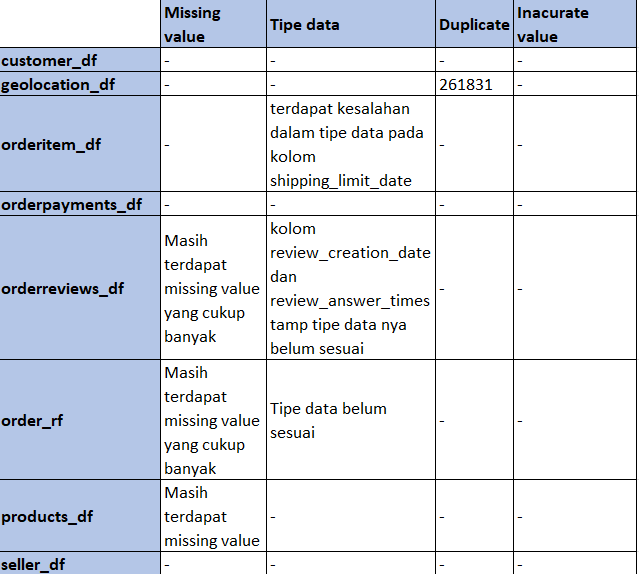

#### customer_df

**Insight:**
- Data customer sudah bersih

#### geolocation_df

In [ ]:
geolocation_df.drop_duplicates(inplace=True)

In [ ]:
geolocation_df.duplicated().sum()

0

**Insight:**
- Dilakukan penghapusan duplikat pada dataset geolocation
- geolocation_df telah bersih dari data duplikat

#### orderitem_df

In [ ]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
orderitems_df['shipping_limit_date'] = pd.to_datetime(orderitems_df['shipping_limit_date'])

In [ ]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight :**
- Kolom shipping_limit_date menjadi datetime

#### orderpayment_df

**Insight :**
- Data sudah bersih

#### orderreviews_df

- Tabel hanya kolom review_score yang digunakan, jadi kolom lain yang masih missing values tidak diatasi

#### order_df

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


- ubah kolom nomor 3-7 menjadi datetime

In [ ]:
missingValue_columns = ["order_approved_at",'order_delivered_carrier_date','order_delivered_customer_date']

for x in missingValue_columns:
  orders_df[x] = orders_df[x].fillna(method='ffill')

<ipython-input-60-6d1ffa145cca>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df[x] = orders_df[x].fillna(method='ffill')


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**Insight :**
- Misiing values pada kolom bertipe data datetime diisi menggunakan metode forward fill

#### product_df

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
product_misval=['product_weight_g','product_length_cm','product_height_cm','product_width_cm']

for i in product_misval:
  products_df[i] = products_df[i].fillna(products_df[i].mode()[0])

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight :**
- missing value pada kolom product_weight_g,product_length_cm,product_height_cm,product_width_cm diisi dengan nilai modus
- untuk missing value pada kolom lain dibiarkan karena tidak mempengaruhi hasil analisis

#### seller_df

- Data sudah bersih

## Exploratory Data Analysis (EDA)

### Explore customer_df

In [ ]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customer_df.groupby(by='customer_city').agg({
    'customer_unique_id':'nunique',
    'customer_id':'nunique'
}).sort_values(by='customer_unique_id',ascending=False)

,customer_unique_id,customer_id
customer_city,,
sao paulo,14984,15540
rio de janeiro,6620,6882
belo horizonte,2672,2773
brasilia,2069,2131
curitiba,1465,1521
...,...,...
ibertioga,1,1
ibiajara,1,1
ibiara,1,1


In [ ]:
customer_df.groupby(by='customer_state').agg({
    'customer_unique_id':'nunique',
    'customer_id':'nunique'
}).sort_values(by='customer_unique_id',ascending=False)

,customer_unique_id,customer_id
customer_state,,
SP,40302,41746
RJ,12384,12852
MG,11259,11635
RS,5277,5466
PR,4882,5045
SC,3534,3637
BA,3277,3380
DF,2075,2140
ES,1964,2033


**Insight :**
- Jumlah user dan order (customer_id) terbanyak berada di kota Sao Paulo state SP
- Jumlah pengguna dan jumlah order (customer_id) menunjukkan angka yang hampir sama. Menunjukkan bahwa banyaknya user sebanding dengan banyaknya order .
- State seperti AC, AP, dan RR dapat diperluas lagi pemasarannya agar lebih banyak user yang berbelanja

### Explore orderitem_df

In [ ]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
orderitems_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [ ]:
orderitems_df.groupby(by='seller_id').order_id.nunique().sort_values(ascending=False)

,order_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,1854
4a3ca9315b744ce9f8e9374361493884,1806
cc419e0650a3c5ba77189a1882b7556a,1706
1f50f920176fa81dab994f9023523100,1404
da8622b14eb17ae2831f4ac5b9dab84a,1314
...,...
ceb7b4fb9401cd378de7886317ad1b47,1
cecd97bc34ed8330bd4cd15713eda670,1
5b92bfa4120daa27c574daa2e386c693,1


In [ ]:
orderitems_df.groupby(by='product_id').agg({
    'order_id':'nunique',
    'freight_value':'sum'
}).sort_values(by='order_id',ascending=False)

,order_id,freight_value
product_id,,
99a4788cb24856965c36a24e339b6058,467,8046.04
aca2eb7d00ea1a7b8ebd4e68314663af,431,7211.86
422879e10f46682990de24d770e7f83d,352,7624.04
d1c427060a0f73f6b889a5c7c61f2ac4,323,13761.52
389d119b48cf3043d311335e499d9c6b,311,7242.09
...,...,...
69c58bb97c8d7b75fad9e6c1d391fda6,1,23.54
69c3a9ec3f1094ad11505df27ddad569,1,13.15
69c2f05e34d543dc71cfe745bfac8499,1,16.82


**Insight:**
- Rentang harga barang berkisasr diantara 0.85 - 6735
- Pelanggan membeli paling banyak 21 item yang sama dalam satu order.
- Sller 6560211a19b47992c3666cc44a7e94c0 mendapat jumlah order paling banyak
- Product_id 99a4788cb24856965c36a24e339b6058 paling banyak dibeli

### orderpayment_df

In [ ]:
orderpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
orderpayments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
orderpayments_df.groupby(by='payment_type').agg({
    'payment_type':'count',
    'payment_value':'sum'
}).rename(columns={
    'payment_type':'count'
}).sort_values(by='count',ascending=False)

,count,payment_value
payment_type,,
credit_card,76795,12542084.19
boleto,19784,2869361.27
voucher,5775,379436.87
debit_card,1529,217989.79
not_defined,3,0.00


In [ ]:
orderpayments_df.groupby(by='payment_installments').agg({
    'payment_installments':'count',
}).rename(columns={
    'payment_installments':'count'}).sort_values(by='count',ascending=False)

,count
payment_installments,
1,52546
2,12413
3,10461
4,7098
10,5328
5,5239
8,4268
6,3920
7,1626


**Insight :**
- Rata-rata transaction value adalah 154 dengan transaksi paling besar yaitu sebesar 13664
- Pelanggan paling banyak bertransaksi menggunakan credit card
- Pelanggan mayoritas langsung melunasi tagihannya (sekali bayar)

### orderreviews_df

In [ ]:
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
orderreviews_df['review_creation_date']=pd.to_datetime(orderreviews_df['review_creation_date'])
orderreviews_df['review_answer_timestamp']=pd.to_datetime(orderreviews_df['review_answer_timestamp'])

In [ ]:
answered_time=orderreviews_df['review_answer_timestamp']-orderreviews_df['review_creation_date']
answered_time = answered_time.apply(lambda x: x.total_seconds())
orderreviews_df["answered_time"] = round(answered_time/86400)
orderreviews_df["answered_time"]=orderreviews_df["answered_time"].astype(int)

In [ ]:
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,answered_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,2
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1


In [ ]:
orderreviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,answered_time
count,99224,99224,99224.000000,11568,40977,99224,99224,99224.000000
unique,98410,98673,NaN,4527,36159,NaN,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688,3.213658
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28,0.000000
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872,1.000000
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000,2.000000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000,3.000000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35,519.000000


In [ ]:
orderreviews_df['review_score'].value_counts()

,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


**Insight :**
- rata-rata review customer sebesar 4.08, menunjukkan review yang positif dari customer
- rata-rata pertanyaan customer dijawab dalam waktu 3 hari
- Respon paling cepat dibalas dalam waktu beberapa jam saja dan maksimal dalam 519 hari
- Banyak yang memberikan review score 5, tapi cukup banyak juga yang memberikan review score 1

### order_df

In [ ]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [ ]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232,14.221327
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-552.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,693.000000


In [ ]:
orders_df = orders_df[orders_df['delivery_time'] >= 0].reset_index(drop=True)

In [ ]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,98232,98232,98232,98232,98232,98232,98232,98232,98232.000000
unique,98232,98232,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96471,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 13:04:22.725344256,2017-12-31 04:17:39.389119488,2018-01-05 06:06:51.487193344,2018-01-15 18:08:31.452734464,2018-01-23 07:58:33.804056064,16.169690
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-11 14:15:11.249999872,2017-09-12 04:44:41.750000128,2017-09-18 16:21:37,2017-09-27 17:40:39.249999872,2017-10-02 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 09:11:54,2018-01-18 17:02:40.500000,2018-01-24 18:21:33.500000,2018-02-05 18:07:57.500000,2018-02-14 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 08:40:40.500000,2018-05-04 16:13:33.500000,2018-05-08 14:38:00,2018-05-16 19:16:47,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,693.000000


In [ ]:
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96471
shipped,604
unavailable,423
canceled,311
processing,212
invoiced,205
created,4
approved,2


In [ ]:
delivery_delay=orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']
delivery_delay=delivery_delay.apply(lambda x: x.total_seconds())
orders_df['delivery_delay']=round(delivery_delay/86400)
orders_df['delivery_delay'] = orders_df['delivery_delay'].apply(lambda x: 'on time' if x <= 0 else 'delayed')

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,on time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,on time


In [ ]:
orders_df['delivery_delay'].value_counts()

,count
delivery_delay,
on time,88968
delayed,9264


**Insight :**
- rata-rata waktu delivery yaitu 14 hari
- terdapat kesalahan dalam data, dimana pada data order_purchase_timestamp terjadi terlebih dahulu dibandingkan order_delivered_customer_date yang menyebabkan terdapat waktu delivery yang minus
- Status pesanan mayoritas sudah ter-delivery
- Banyak pesanan yang datang tepat waktu dan sedikit yang tertunda

### product_df

In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_df['product_volume']=products_df['product_length_cm']*products_df['product_height_cm']*products_df['product_width_cm']
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


In [ ]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume
count,32951,32341,32341.000000,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.346454,30.814179,16.937240,23.195988,16563.198143
std,NaN,NaN,10.245741,635.115225,1.736766,4281.939332,16.914339,13.637247,12.079055,27056.466301
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,168.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2880.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,6840.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,18480.000000


In [ ]:
prodscategory_df=pd.merge(
    left=products_df,
    right=products_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

prodscategory_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,housewares


In [ ]:
prodscategory_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


**Insight :**
- Produk kategori paling banyak dijual yaitu bed_nath_table
- Rata-rata volume produk yaitu 16563cm3, minimal 168cm3, dan max 296208cm3

### Explore seller_df

In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers_df.groupby(by=['seller_state','seller_city']).seller_id.nunique().sort_values(ascending=False)

seller_state  seller_city           
SP            sao paulo                 694
PR            curitiba                  124
RJ            rio de janeiro             93
MG            belo horizonte             66
SP            ribeirao preto             52
                                       ... 
RJ            tres rios                   1
              saquarema                   1
              sao pedro da aldeia         1
              santo antonio de padua      1
SC            camboriu                    1
Name: seller_id, Length: 636, dtype: int64

**Insight :**
- seller paling banyak berada di sao paulo

### Explore review_df dan order_df

In [ ]:
review_order_df=pd.merge(
    left=orders_df,
    right=orderreviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

review_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_delay,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,answered_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,on time,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,3.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,on time,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51,2.0


In [ ]:
review_order_df.groupby(by='review_score').delivery_time.mean().sort_values(ascending=False)

,delivery_time
review_score,
1.0,42.984262
2.0,24.991528
3.0,17.531486
4.0,13.313233
5.0,11.282094


**Insight :**
- Semakin lama pengiriman, maka review juka akan semakin buruk

### Explore order_df dan orderpayment_df

In [ ]:
order_payment_df=pd.merge(
    left=orders_df,
    right=orderpayments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

order_payment_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_delay,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time,1.0,credit_card,3.0,179.12


In [ ]:
order_payment_df.groupby(by='customer_id').payment_value.sum().sort_values(ascending=False)

,payment_value
customer_id,
1617b1357756262bfa56ab541c47bc16,13664.08
ec5b2ba62e574342386871631fafd3fc,7274.88
c6e2731c5b391845f6800c97401a43a9,6929.31
f48d464a0baaea338cb25f816991ab1f,6922.21
3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
...,...
046f890135acc703faff4c1fc0c2d73c,11.56
8e4bd65db637116b6b68109e4df21b84,10.89
184e8e8e48937145eb96c721ef1f0747,10.07


**Insight :**
- customer dengan id 1617b1357756262bfa56ab541c47bc16 mempunyai transaksi paling besar

### Explore order_df dan customer_df

In [ ]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
order_customer_df=pd.merge(
    left=orders_df,
    right=customer_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

order_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_delay,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,on time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,on time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
order_customer_df.groupby(by='customer_state').delivery_time.mean().sort_values(ascending=True)

,delivery_time
customer_state,
SP,12.243817
PR,15.066360
MG,15.184103
DF,16.049219
MS,18.183357
ES,18.193452
RS,18.395726
SC,18.991408
GO,19.138138


In [ ]:
order_customer_df.groupby(by=['customer_state','delivery_delay']).order_id.nunique()

customer_state  delivery_delay
AC              delayed               3
                on time              77
AL              delayed             105
                on time             303
AM              delayed               8
                on time             139
AP              delayed               3
                on time              65
BA              delayed             522
                on time            2810
CE              delayed             219
                on time            1088
DF              delayed             176
                on time            1937
ES              delayed             262
                on time            1754
GO              delayed             193
                on time            1805
MA              delayed             154
                on time             581
MG              delayed             788
                on time           10749
MS              delayed              85
                on time             624
MT              delayed              68
                on time             829
PA              delayed             128
                on time             834
PB              delayed              66
                on time             461
PE              delayed             208
                on time            1427
PI              delayed              84
                on time             404
PR              delayed             311
                on time            4692
RJ              delayed            1899
                on time           10736
RN              delayed              55
                on time             423
RO              delayed              14
                on time             236
RR              delayed               8
                on time              36
RS              delayed             443
                on time            4985
SC              delayed             398
                on time            3210
SE              delayed              61
                on time             285
SP              delayed            2965
                on time           38238
TO              delayed              38
                on time             240
Name: order_id, dtype: int64

**Insight :**
- State SP mempunyai waktu delivery yang relatif singkat hanya 12 hari, sedangkan state RR memiliki waktu delivery yang paling lama yaitu 45 hari
- Pesanan terlambat datang paling banyak di state SP, meskipun pesanan yang datang tepat waktu juga banyak.

### Explore orderitem_df dan products_df

In [ ]:
orderitem_products_df=pd.merge(
    left=orderitems_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
orderitem_products_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,53400.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,44460.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,9576.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,8000.0


In [ ]:
orderitem_products_df.groupby(by='product_id').order_item_id.count().sort_values(ascending=False)

,order_item_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
...,...
6ca99f05e9c1952a6597264e87f01378,1
6ca54e191592a843087a042b0665d7ef,1
6ca5428af5edb5066b1966ad58501b60,1


In [ ]:
orderitem_products_df.groupby(by='product_category_name').order_item_id.count().sort_values(ascending=False)

,order_item_id
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


In [ ]:
orderitem_products_df.groupby(by='product_category_name').price.sum().sort_values(ascending=False)

,price
product_category_name,
beleza_saude,1258681.34
relogios_presentes,1205005.68
cama_mesa_banho,1036988.68
esporte_lazer,988048.97
informatica_acessorios,911954.32
...,...
flores,1110.04
casa_conforto_2,760.27
cds_dvds_musicais,730.00


In [ ]:
orderitem_products_df.groupby(by='product_category_name').freight_value.sum().sort_values(ascending=False)

,freight_value
product_category_name,
cama_mesa_banho,204693.04
beleza_saude,182566.73
moveis_decoracao,172749.30
esporte_lazer,168607.51
informatica_acessorios,147318.08
...,...
portateis_cozinha_e_preparadores_de_alimentos,309.76
cds_dvds_musicais,224.99
pc_gamer,133.57


In [ ]:
orderitem_products_df.groupby(by='product_category_name').product_volume.mean().sort_values(ascending=False)

,product_volume
product_category_name,
moveis_escritorio,74018.172679
moveis_colchao_e_estofado,69557.710526
moveis_cozinha_area_de_servico_jantar_e_jardim,51949.128114
eletrodomesticos_2,47954.546218
moveis_quarto,47933.403670
...,...
livros_tecnicos,3137.254682
relogios_presentes,2850.278751
livros_importados,2105.716667


** Insight:**
- product id dengan id 'aca2eb7d00ea1a7b8ebd4e68314663af' merupakan produk yang paling banyak dibeli
- product bed_bath_table menjadi produk yang paling banyak dipesan
- beleza_saude (helath_beauty) menjadi produk yang mempunyai akumulasi harga tertinggi
- product bed_bath_table mempuyai total ongkir yang paling mahal karena paling banyak dipesan
- office_furniture memiliki rata-rata volume produk terbesar

### Explore orderitems_df dan seller_df

In [ ]:
orderitem_seller_df=pd.merge(
    left=orderitems_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
orderitem_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
orderitem_seller_df.groupby(by='seller_id').order_item_id.count().sort_values(ascending=False)

,order_item_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...
5f57db27027655e6c6a391601daa0258,1
5e25c632f9db6cfb8bc100421c2737b6,1
5e106d93b717c2682b9383da480364a1,1


In [ ]:
orderitem_seller_df.groupby(by='seller_state').order_id.count().sort_values(ascending=False)

,order_id
seller_state,
SP,80342
MG,8827
PR,8671
RJ,4818
SC,4075
RS,2199
DF,899
BA,643
GO,520


In [ ]:
orderitem_seller_df.groupby(by='seller_state').agg({
    'freight_value':['sum','min','max']
}).sort_values(by=('freight_value','sum'),ascending=False)

freight_value               
                       sum    min     max
seller_state                             
SP              1482487.67   0.00  375.28
MG               212595.06   0.01  321.46
PR               197013.52   0.09  409.68
SC               106547.06   0.03  339.59
RJ                93829.90   0.08  170.80
RS                57243.09   0.03  225.71
BA                19700.68   4.66  132.19
DF                18494.06   2.96  145.31
GO                12565.50   2.01  227.66
PE                12392.46   2.71  127.82
ES                12171.13   7.84  131.01
MA                12141.29   8.82   84.63
MT                 4631.73  11.21   91.32
CE                 4359.83   5.27  203.38
PB                 1489.15   9.63  133.87
RN                 1304.11   7.98   97.32
MS                 1198.96   1.14   62.71
RO                  712.78  15.29   75.12
PI                  443.32  20.08   60.56
SE                  318.49  21.68   43.47
PA                  155.11  15.10   35.75
AM                   81.80  21.25   35.26
AC                   32.84  32.84   32.84

**Insight :**
- seller dengan id '6560211a19b47992c3666cc44a7e94c0' adalah seller dengan  jumlah order terbanyak
- Seller yang berada di state SP mempunyai jumlah order terbanyak sedangakan seller di state AC mendapat jumlah order paling sedikit
- Pada state SP mempunyai total ongkir tertinggi dan max ongkir berada di harga 375
- Dilihat dari freight_value dan order_id by seller_state menunjukkan bahwa jumlah seller hanya berpusat pada state SP dan sekitarnya. Sedangkan state yang berada di pinggiran brazil seperti AC, AM, PA, SE, dan lain-lain masih sedikit.

### Explore all_df

In [ ]:
orderitems_orders_df=pd.merge(
    left=orderitems_df,
    right=orders_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
orderitems_orders_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_delay
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,on time
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,on time
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,on time
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,on time
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,on time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,17.0,on time
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,9.0,on time
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,5.0,on time
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,2.0,on time


In [ ]:
import functools as ft
dfs=[order_payment_df,review_order_df,order_customer_df,orderitem_products_df,orderitem_seller_df]
df = ft.reduce(lambda left, right: pd.merge(left, right, on='order_id'), dfs)
df

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,delivery_time_x,delivery_delay_x,...,product_volume,order_item_id_y,product_id_y,seller_id_y,shipping_limit_date_y,price_y,freight_value_y,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,1976.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,1976.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,1976.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time,...,4693.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time,...,9576.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163450,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,8000.0,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG
163451,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,8000.0,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG
163452,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,8000.0,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG
163453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,8000.0,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163455 entries, 0 to 163454
Data columns (total 67 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         163455 non-null  object        
 1   customer_id_x                    163455 non-null  object        
 2   order_status_x                   163455 non-null  object        
 3   order_purchase_timestamp_x       163455 non-null  datetime64[ns]
 4   order_approved_at_x              163455 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   163455 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  163455 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  163455 non-null  datetime64[ns]
 8   delivery_time_x                  163455 non-null  float64       
 9   delivery_delay_x                 163455 non-null  object        
 10  payment_sequential               163446 non-

In [ ]:
columns_to_drop = [col for col in df.columns if col.endswith('_y')]#hapus kolom '_y'
cleaned_df = df.drop(columns=columns_to_drop)#drop kolom duplikat


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163455 entries, 0 to 163454
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         163455 non-null  object        
 1   customer_id_x                    163455 non-null  object        
 2   order_status_x                   163455 non-null  object        
 3   order_purchase_timestamp_x       163455 non-null  datetime64[ns]
 4   order_approved_at_x              163455 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   163455 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  163455 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  163455 non-null  datetime64[ns]
 8   delivery_time_x                  163455 non-null  float64       
 9   delivery_delay_x                 163455 non-null  object        
 10  payment_sequential               163446 non-

In [ ]:
cleaned_df = cleaned_df.rename(columns={col: col.replace('_x','') for col in cleaned_df.columns if col.endswith('_x')})#rename kolom dengan akhiran '_x'

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163455 entries, 0 to 163454
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       163455 non-null  object        
 1   customer_id                    163455 non-null  object        
 2   order_status                   163455 non-null  object        
 3   order_purchase_timestamp       163455 non-null  datetime64[ns]
 4   order_approved_at              163455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   163455 non-null  datetime64[ns]
 6   order_delivered_customer_date  163455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  163455 non-null  datetime64[ns]
 8   delivery_time                  163455 non-null  float64       
 9   delivery_delay                 163455 non-null  object        
 10  payment_sequential             163446 non-null  float64       
 11  

In [ ]:
all_df = cleaned_df.loc[:, ~cleaned_df.columns.duplicated(keep='first')]

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163455 entries, 0 to 163454
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       163455 non-null  object        
 1   customer_id                    163455 non-null  object        
 2   order_status                   163455 non-null  object        
 3   order_purchase_timestamp       163455 non-null  datetime64[ns]
 4   order_approved_at              163455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   163455 non-null  datetime64[ns]
 6   order_delivered_customer_date  163455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  163455 non-null  datetime64[ns]
 8   delivery_time                  163455 non-null  float64       
 9   delivery_delay                 163455 non-null  object        
 10  payment_sequential             163446 non-null  float64       
 11  

In [ ]:
all_df_new = pd.merge(
    left=all_df,
    right=orderitems_orders_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df_new

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,delivery_time_x,delivery_delay_x,...,freight_value_y,customer_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,delivery_time_y,delivery_delay_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time,...,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time,...,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373124,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time
373125,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time
373126,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time
373127,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time


In [ ]:
all_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373129 entries, 0 to 373128
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         373129 non-null  object        
 1   customer_id_x                    373129 non-null  object        
 2   order_status_x                   373129 non-null  object        
 3   order_purchase_timestamp_x       373129 non-null  datetime64[ns]
 4   order_approved_at_x              373129 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   373129 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  373129 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  373129 non-null  datetime64[ns]
 8   delivery_time_x                  373129 non-null  float64       
 9   delivery_delay_x                 373129 non-null  object        
 10  payment_sequential               373102 non-

In [ ]:
columns_to_drop = [col for col in all_df_new.columns if col.endswith('_y')]#hapus kolom '_y'
cleaned_df = all_df_new.drop(columns=columns_to_drop)#drop kolom duplikat
cleaned_all_df = cleaned_df.rename(columns={col: col.replace('_x','') for col in cleaned_df.columns if col.endswith('_x')})#rename kolom akhiran '_x'
cleaned_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373129 entries, 0 to 373128
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       373129 non-null  object        
 1   customer_id                    373129 non-null  object        
 2   order_status                   373129 non-null  object        
 3   order_purchase_timestamp       373129 non-null  datetime64[ns]
 4   order_approved_at              373129 non-null  datetime64[ns]
 5   order_delivered_carrier_date   373129 non-null  datetime64[ns]
 6   order_delivered_customer_date  373129 non-null  datetime64[ns]
 7   order_estimated_delivery_date  373129 non-null  datetime64[ns]
 8   delivery_time                  373129 non-null  float64       
 9   delivery_delay                 373129 non-null  object        
 10  payment_sequential             373102 non-null  float64       
 11  

In [ ]:
cleaned_all_df.groupby(by=['customer_state','product_category_name']).agg({
    'order_id':'count',
    'price':'sum',

})

order_id    price
customer_state product_category_name                         
AC             artigos_de_natal                    1    69.90
               automotivo                          5   606.97
               bebes                               3   697.84
               beleza_saude                       13  2495.98
               brinquedos                          3   234.79
...                                              ...      ...
TO             portateis_casa_forno_e_cafe         1  1999.00
               relogios_presentes                 60  8272.89
               telefonia                          27  1406.06
               telefonia_fixa                      2  1390.99
               utilidades_domesticas              40  1931.87

[1365 rows x 2 columns]

In [ ]:
cleaned_all_df.groupby(by='customer_state')['freight_value'].mean().sort_values(ascending=False)

,freight_value
customer_state,
PB,65.129772
RR,44.821977
PI,41.593545
MA,38.457988
SE,35.402378
RO,34.820769
PA,34.740076
AM,34.023355
TO,33.203805


In [ ]:
cleaned_all_df.groupby(by='product_category_name')['review_score'].mean().sort_values(ascending=False)

,review_score
product_category_name,
fashion_roupa_infanto_juvenil,4.714286
livros_importados,4.603604
cds_dvds_musicais,4.576923
construcao_ferramentas_ferramentas,4.503817
fashion_underwear_e_moda_praia,4.429530
...,...
moveis_sala,2.538290
telefonia_fixa,2.514594
seguros_e_servicos,2.500000


In [ ]:
cleaned_all_df.groupby(by='customer_state').payment_value.sum().sort_values(ascending=False)

,payment_value
customer_state,
SP,71075161.61
GO,25413736.13
RJ,21794561.42
MG,12118008.08
PR,12069270.83
RS,8256950.24
BA,6258500.90
SC,5788006.12
MT,1772220.38


**Insight :**
- top category product tiap state berbeda-beda, contohnya pada state AP prdouk terlakunya adalah beleza_saude (health_beauty)
- State PB mempunyai ongkir yang paling mahal. sedangkan sau paulo mempunyai ongkir paling rendah.
- kategori produk cds_dvds_musicais (musik cd/dvd) memiliki rating paling bagus, diikuti dengan fashion_roupa_infanto_juvenil (baju anak-anak)
- customer yang berada di state SP mempunyai nilai transaksi paling tinggi, menunjukkan daya beli masyarakat SP sangat tinggi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [ ]:
monthly_orders_df = order_payment_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df

<ipython-input-134-97a255d6b48a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = order_payment_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
0,2016-09,4,252.24
1,2016-10,324,59090.48
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,799,138349.69
5,2017-02,1780,291908.01
6,2017-03,2679,449256.02
7,2017-04,2399,416937.51
8,2017-05,3687,591518.23
9,2017-06,3236,509803.56


In [ ]:
monthly_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_purchase_timestamp  24 non-null     object 
 1   order_count               24 non-null     int64  
 2   revenue                   24 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 704.0+ bytes


In [ ]:
monthly_orders_df['order_purchase_timestamp'] = pd.to_datetime(monthly_orders_df['order_purchase_timestamp'])

In [ ]:
# Filter data untuk tahun 2016
monthly_orders_2016_df = order_payment_df[order_payment_df['order_purchase_timestamp'].dt.year == 2016]
# Filter data untuk tahun 2017
monthly_orders_2017_df = order_payment_df[order_payment_df['order_purchase_timestamp'].dt.year == 2017]
# Filter data untuk tahun 2018
monthly_orders_2018_df = order_payment_df[order_payment_df['order_purchase_timestamp'].dt.year == 2018]

In [ ]:
monthly_orders_2016_df = monthly_orders_2016_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})


monthly_orders_2016_df.index = monthly_orders_2016_df.index.strftime('%B')


monthly_orders_2016_df = monthly_orders_2016_df.reset_index()
monthly_orders_2016_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)


<ipython-input-138-a0b82ab085a7>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_2016_df = monthly_orders_2016_df.resample(rule='M', on='order_purchase_timestamp').agg({


In [ ]:
monthly_orders_2017_df = monthly_orders_2017_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})


monthly_orders_2017_df.index = monthly_orders_2017_df.index.strftime('%B')


monthly_orders_2017_df = monthly_orders_2017_df.reset_index()
monthly_orders_2017_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

<ipython-input-139-f00b0460ed06>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_2017_df = monthly_orders_2017_df.resample(rule='M', on='order_purchase_timestamp').agg({


In [ ]:
monthly_orders_2018_df = monthly_orders_2018_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})


monthly_orders_2018_df.index = monthly_orders_2018_df.index.strftime('%B')


monthly_orders_2018_df = monthly_orders_2018_df.reset_index()
monthly_orders_2018_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

<ipython-input-140-2608e048af3d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_2018_df = monthly_orders_2018_df.resample(rule='M', on='order_purchase_timestamp').agg({


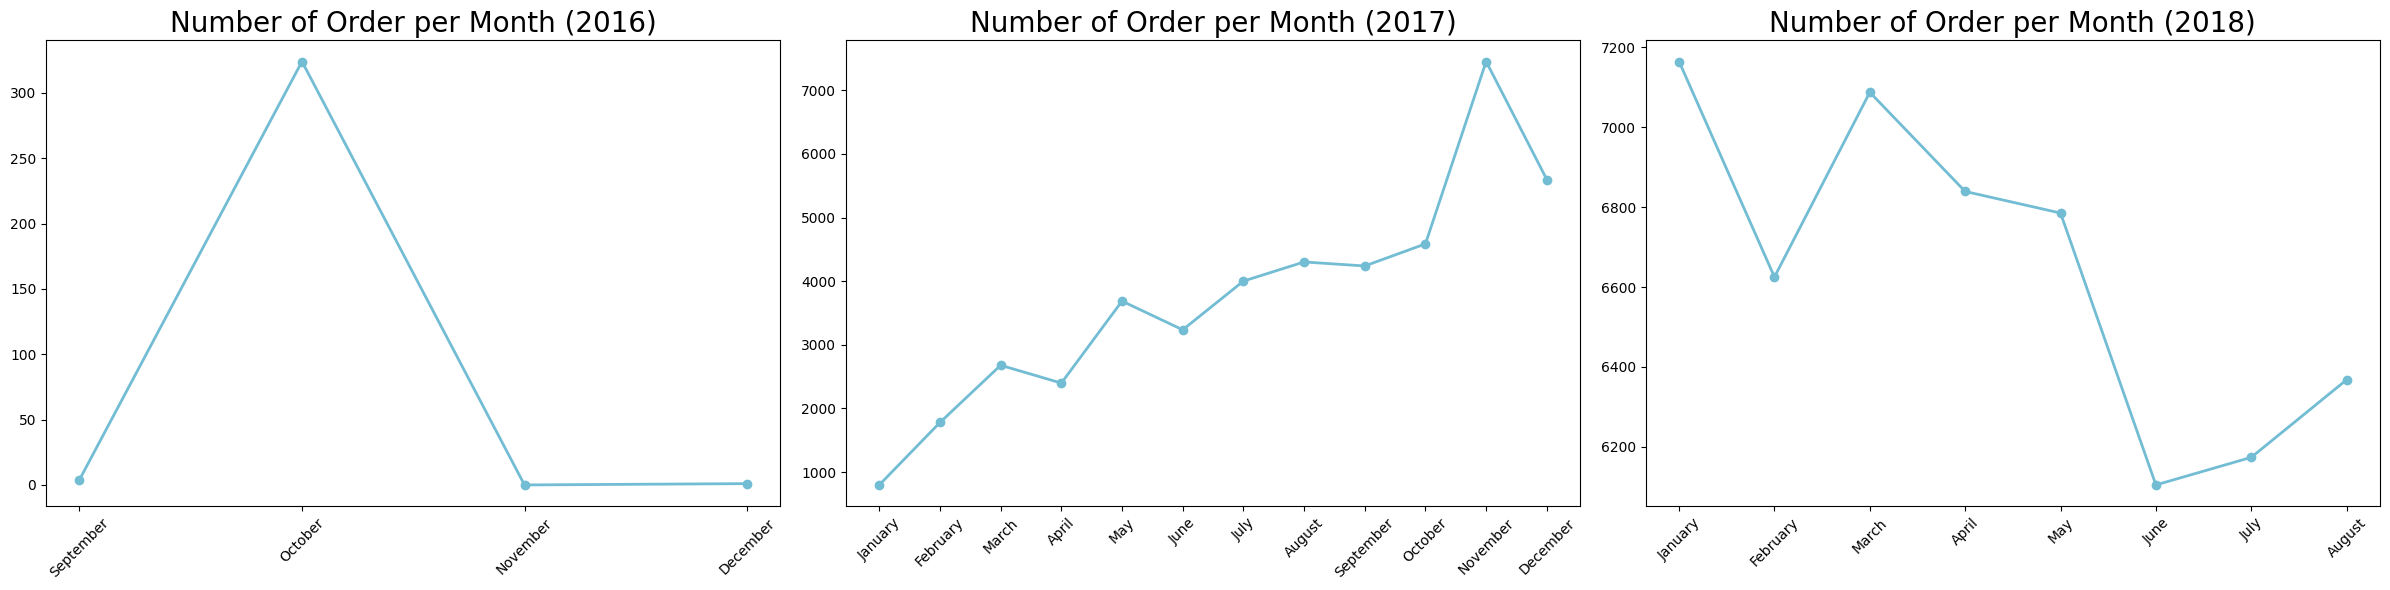

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

ax[0].plot(
    monthly_orders_2016_df["order_purchase_timestamp"],
    monthly_orders_2016_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
ax[0].set_title("Number of Order per Month (2016)", loc="center", fontsize=20)
ax[0].tick_params(axis='x',labelsize=10, rotation=45)
ax[0].tick_params(axis='y',labelsize=10)


ax[1].plot(
    monthly_orders_2017_df["order_purchase_timestamp"],
    monthly_orders_2017_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
ax[1].set_title("Number of Order per Month (2017)", loc="center", fontsize=20)
ax[1].tick_params(axis='x',labelsize=10, rotation=45)
ax[1].tick_params(axis='y',labelsize=10)


ax[2].plot(
    monthly_orders_2018_df["order_purchase_timestamp"],
    monthly_orders_2018_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
ax[2].set_title("Number of Order per Month (2018)", loc="center", fontsize=20)
ax[2].tick_params(axis='x',labelsize=10,rotation=45)
ax[2].tick_params(axis='y',labelsize=10)


plt.tight_layout()
plt.show()

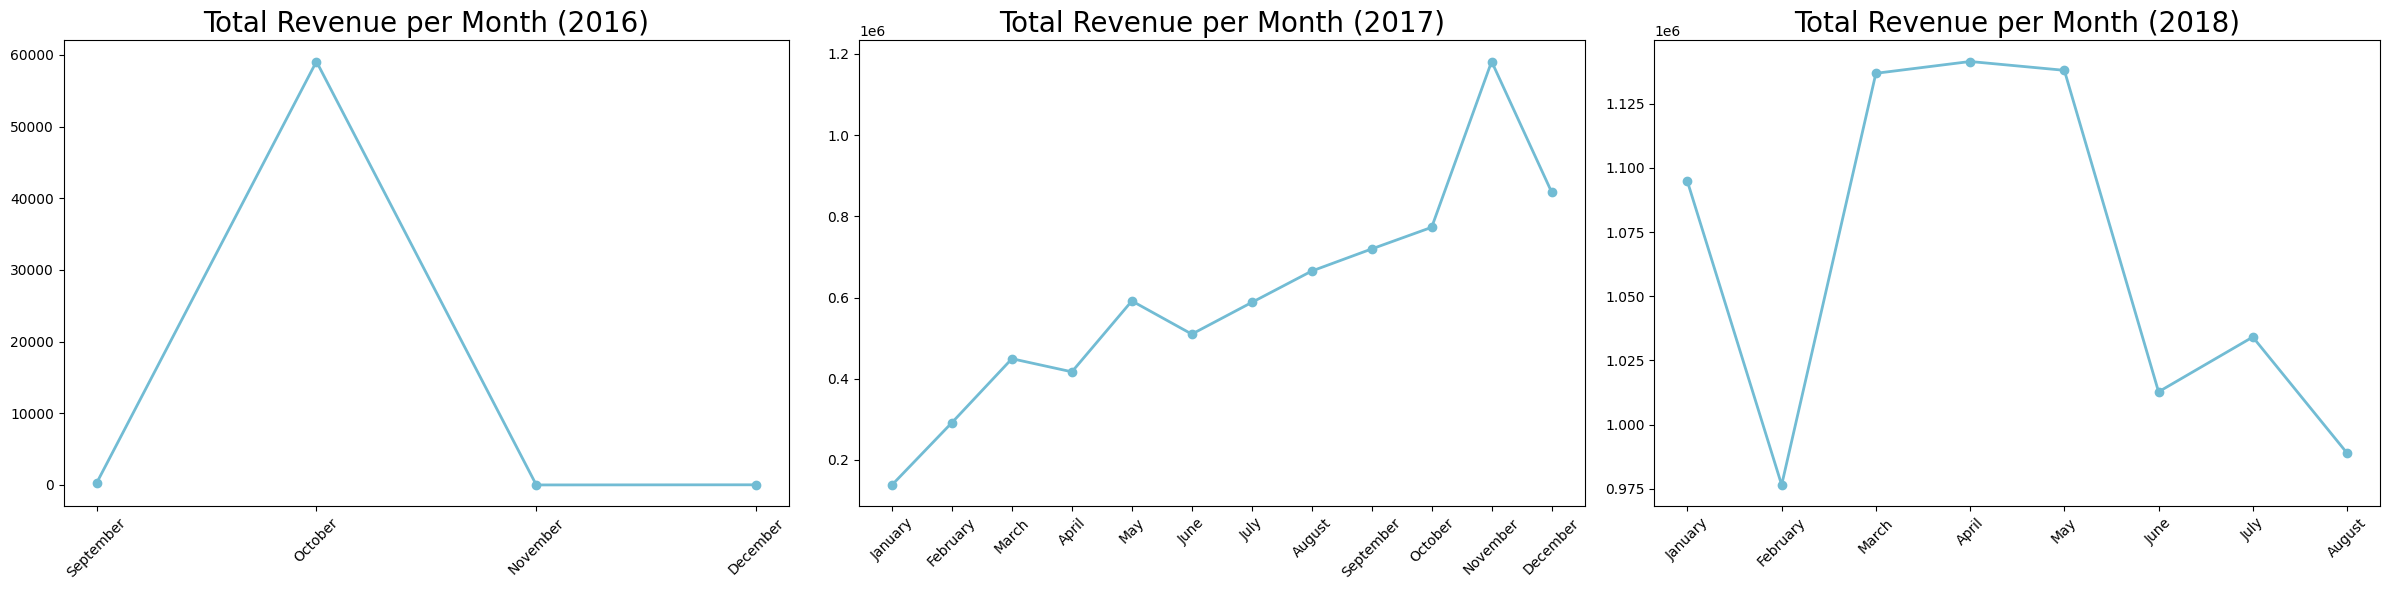

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

ax[0].plot(
    monthly_orders_2016_df["order_purchase_timestamp"],
    monthly_orders_2016_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
ax[0].set_title("Total Revenue per Month (2016)", loc="center", fontsize=20)
ax[0].tick_params(axis='x',labelsize=10, rotation=45)
ax[0].tick_params(axis='y',labelsize=10)


ax[1].plot(
    monthly_orders_2017_df["order_purchase_timestamp"],
    monthly_orders_2017_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
ax[1].set_title("Total Revenue per Month (2017)", loc="center", fontsize=20)
ax[1].tick_params(axis='x',labelsize=10,rotation=45)
ax[1].tick_params(axis='y',labelsize=10)


ax[2].plot(
    monthly_orders_2018_df["order_purchase_timestamp"],
    monthly_orders_2018_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
ax[2].set_title("Total Revenue per Month (2018)", loc="center", fontsize=20)
ax[2].tick_params(axis='x',labelsize=10, rotation=45)
ax[2].tick_params(axis='y',labelsize=10)


plt.tight_layout()
plt.show()

Dilihat dari grafik visualisasi, grafik jumlah order dan revenue mempunyai bentuk yang mirip. Dilihat dari grafik tahun 2016, penjualan naik signifikan pada bukan Oktober, tapi mengalami penurunana yang signifikan pada bulan November dan stagnan hingga Desember. Pada tahun 2017, menunjukkan tren positif dari jumlah order dan pendapatan puncakya pada bulan November. Sedangkan pada tahun 2018, tren menunjukkan tren peningkatan dari bulan Februari hingga Mei kemudian pada bulan Mei hingga Agustus menunjukkan tren penurunan.

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?

In [ ]:
sum_order_items_df = orderitem_products_df.groupby("product_category_name").order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_items_df

,product_category_name,order_id
0,cama_mesa_banho,9417
1,beleza_saude,8836
2,esporte_lazer,7720
3,informatica_acessorios,6689
4,moveis_decoracao,6449
...,...,...
68,la_cuisine,13
69,cds_dvds_musicais,12
70,pc_gamer,8
71,fashion_roupa_infanto_juvenil,8


<ipython-input-144-4acefe01679e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-144-4acefe01679e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])


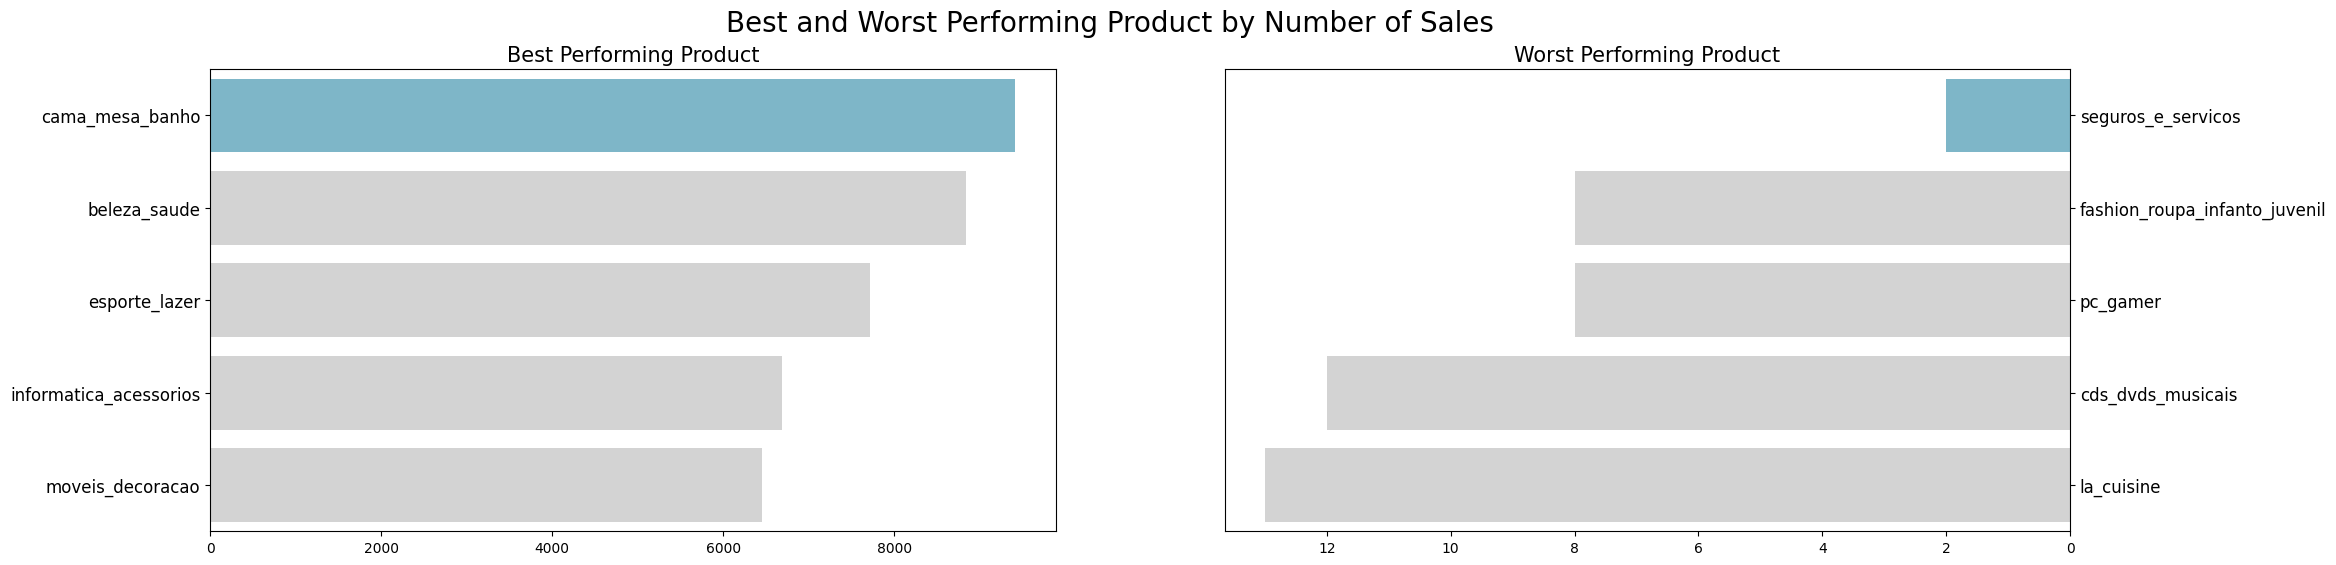

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**
- Kategori produk cama_mesa_banho (bed_bath_table) merupakan produk yang paling banyak dibeli dengan penjualan lebih dari 8000 kali
- seguros_e_servicos (security_services) merupakan produk yang paling sedikit dibeli

### Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?


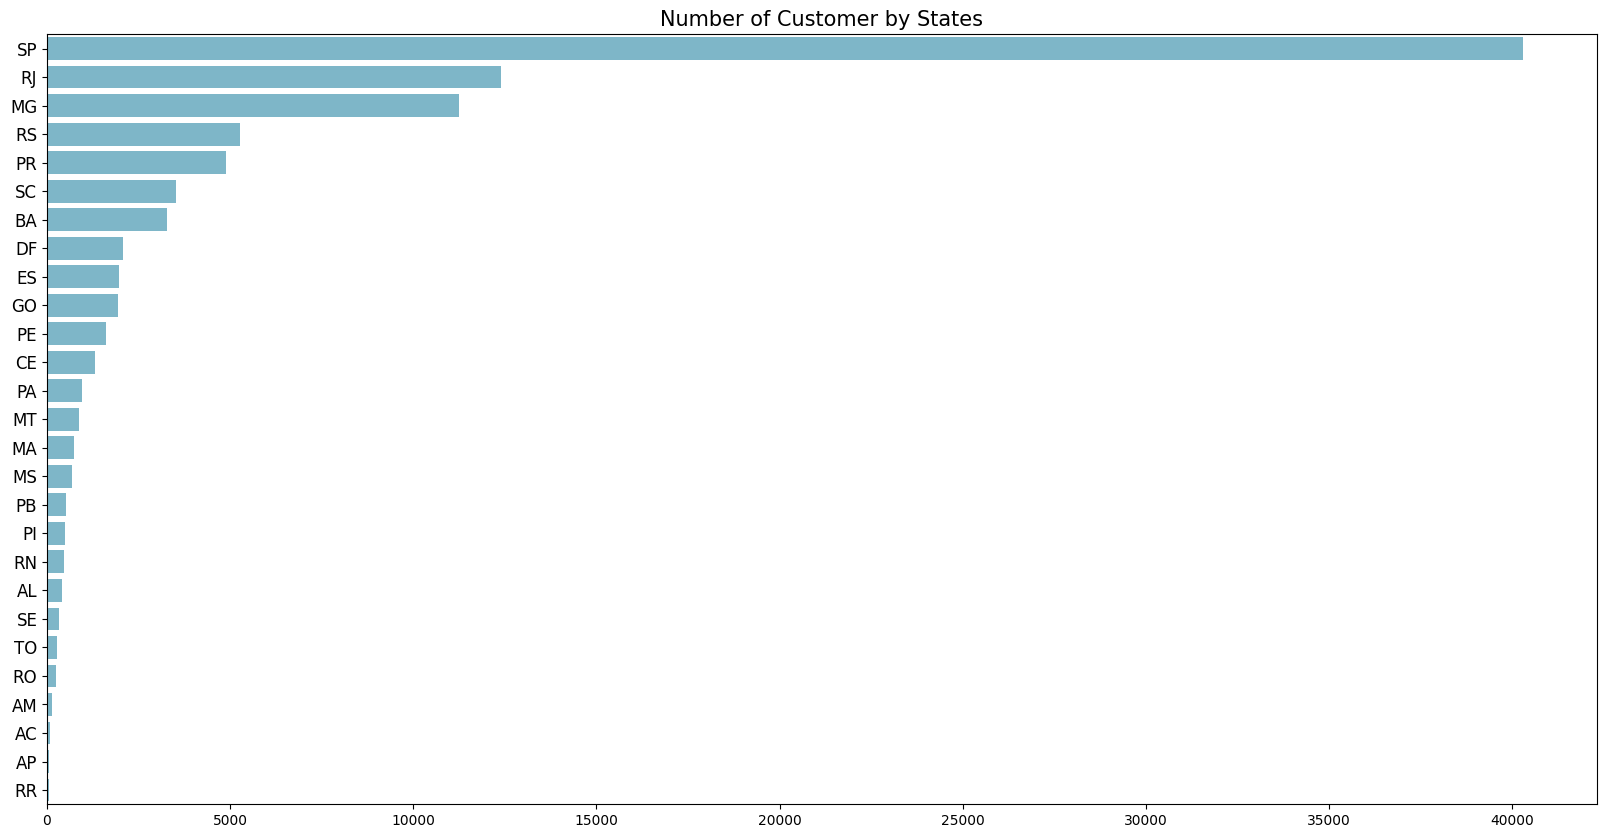

In [ ]:
cust_bystate_df=customer_df.groupby(by='customer_state').customer_unique_id.nunique().reset_index()
cust_bystate_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
cust_bystate_df
plt.figure(figsize=(20, 10))
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=cust_bystate_df.sort_values(by="customer_count", ascending=False),
    color="#72BCD4"
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight :**
- Customer paling banyak berada di state SP diikuti state RJ kemudian MG

### Pertaanyaan 4, 5, 6:
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [ ]:
orderpayment_ordercustomer_df=pd.merge(
    left=order_payment_df,
    right=order_customer_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

orderpayment_ordercustomer_df

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,delivery_time_x,delivery_delay_x,...,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,delivery_time_y,delivery_delay_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,...,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,on time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time,...,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,on time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time,...,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,on time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102592,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,on time,...,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,on time,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
102593,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,on time,...,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,on time,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
102594,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,on time,...,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,on time,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
102595,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,...,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,on time,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
orderpayment_ordercustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102597 entries, 0 to 102596
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         102597 non-null  object        
 1   customer_id_x                    102597 non-null  object        
 2   order_status_x                   102597 non-null  object        
 3   order_purchase_timestamp_x       102597 non-null  datetime64[ns]
 4   order_approved_at_x              102597 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   102597 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  102597 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  102597 non-null  datetime64[ns]
 8   delivery_time_x                  102597 non-null  float64       
 9   delivery_delay_x                 102597 non-null  object        
 10  payment_sequential               102596 non-

In [ ]:
drop_columns = [col for col in orderpayment_ordercustomer_df.columns if col.endswith('_y')]#hapus kolom '_y'
orderpayment_ordercustomer_df = orderpayment_ordercustomer_df.drop(columns=drop_columns)#drop kolom duplikat


In [ ]:
orderpayment_ordercustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102597 entries, 0 to 102596
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102597 non-null  object        
 1   customer_id                    102597 non-null  object        
 2   order_status                   102597 non-null  object        
 3   order_purchase_timestamp       102597 non-null  datetime64[ns]
 4   order_approved_at              102597 non-null  datetime64[ns]
 5   order_delivered_carrier_date   102597 non-null  datetime64[ns]
 6   order_delivered_customer_date  102597 non-null  datetime64[ns]
 7   order_estimated_delivery_date  102597 non-null  datetime64[ns]
 8   delivery_time                  102597 non-null  float64       
 9   delivery_delay                 102597 non-null  object        
 10  payment_sequential             102596 non-null  float64       
 11  

In [ ]:
orderpayment_ordercustomer_df = orderpayment_ordercustomer_df.rename(columns={col: col.replace('_x','') for col in orderpayment_ordercustomer_df.columns if col.endswith('_x')})#rename kolom dengan akhiran '_x'

In [ ]:
last= orderpayment_ordercustomer_df['order_purchase_timestamp'].max()
last

Timestamp('2018-08-29 15:00:37')

In [ ]:
from datetime import timedelta
timebound = last + timedelta(days=1)
timebound

Timestamp('2018-08-30 15:00:37')

In [ ]:
df_rfm = orderpayment_ordercustomer_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x : (timebound- x.max()).days,
    'order_id' : 'nunique',
    'payment_value' : 'sum'})
df_rfm.reset_index(inplace=True)
df_rfm.rename(columns= {'order_purchase_timestamp': 'Recency',
                        'order_id': 'Frequency',
                        'payment_value': 'Monetary Value'},inplace= True)
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary Value
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


<ipython-input-150-d9474f296057>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="customer_unique_id", data=df_rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-150-d9474f296057>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="customer_unique_id", data=df_rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-150-d9474f296057>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Monetary Value", x="customer_unique_id"

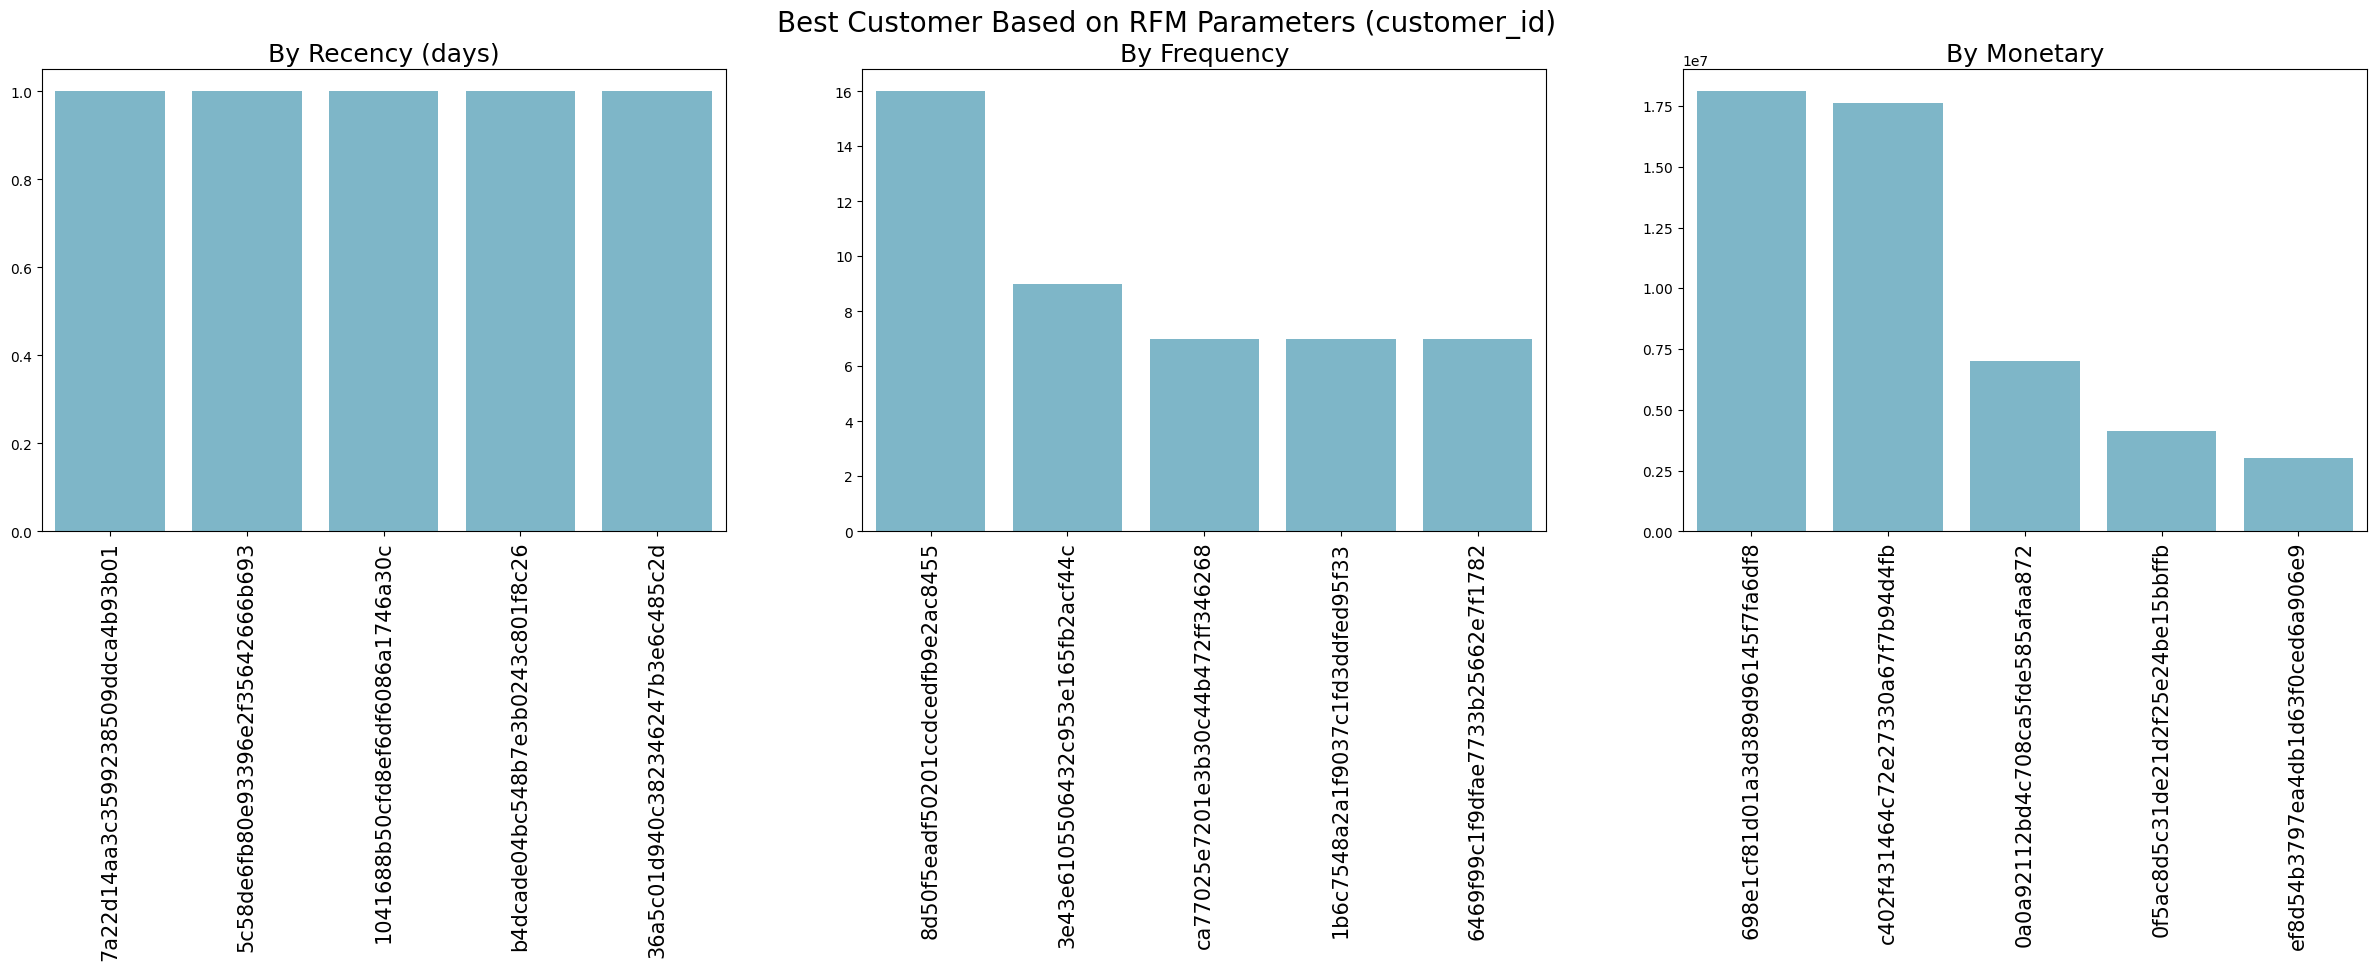

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="customer_unique_id", data=df_rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

sns.barplot(y="Frequency", x="customer_unique_id", data=df_rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15,rotation=90)

sns.barplot(y="Monetary Value", x="customer_unique_id", data=df_rfm.sort_values(by="Monetary Value", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight :**
- Dari grafik tersebut cukup untuk menjawab 3 pertanyaan sekaligus, yaitu pertanyaan nomor 4-6.

### Pertanyaan 7: Bagaimana pertumbuhan seller dari tahun ke tahun?

In [ ]:
monthly_seller_df = orderitems_orders_df.resample(rule='M', on='order_approved_at').seller_id.nunique()
monthly_seller_df.index = monthly_seller_df.index.strftime('%Y-%m')
monthly_seller_df = monthly_seller_df.reset_index()
monthly_seller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
monthly_seller_df

<ipython-input-166-141c92a2e3cf>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_seller_df = orderitems_orders_df.resample(rule='M', on='order_approved_at').seller_id.nunique()


,order_approved_at,seller_count
0,2016-09,1
1,2016-10,144
2,2016-11,0
3,2016-12,1
4,2017-01,221
5,2017-02,430
6,2017-03,501
7,2017-04,502
8,2017-05,579
9,2017-06,538


In [ ]:
monthly_seller_df['order_approved_at']=pd.to_datetime(monthly_seller_df['order_approved_at'])

In [ ]:
monthly_seller_df['month-year']= monthly_seller_df['order_approved_at'].dt.strftime('%b') + '-' + monthly_seller_df['order_approved_at'].dt.strftime('%Y')

monthly_seller_df

,order_approved_at,seller_count,month-year
0,2016-09-01,1,Sep-2016
1,2016-10-01,144,Oct-2016
2,2016-11-01,0,Nov-2016
3,2016-12-01,1,Dec-2016
4,2017-01-01,221,Jan-2017
5,2017-02-01,430,Feb-2017
6,2017-03-01,501,Mar-2017
7,2017-04-01,502,Apr-2017
8,2017-05-01,579,May-2017
9,2017-06-01,538,Jun-2017


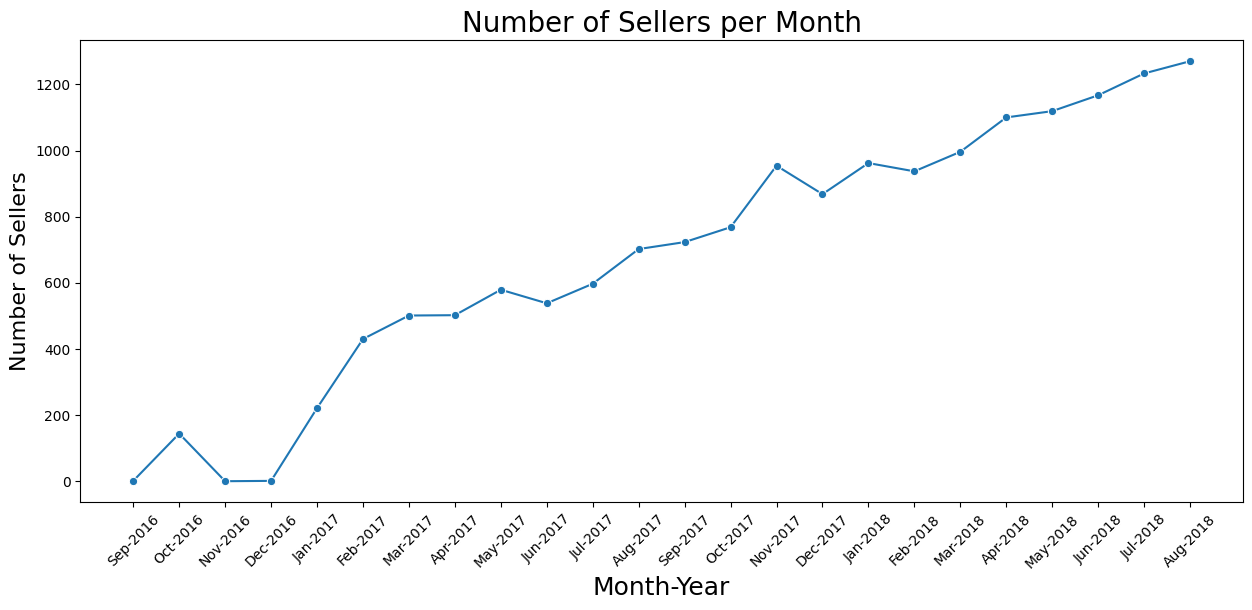

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=monthly_seller_df, x='month-year', y='seller_count', marker='o')
plt.title('Number of Sellers per Month', fontsize=20)
plt.xlabel('Month-Year',fontsize=18)
plt.ylabel('Number of Sellers',fontsize=16)
plt.xticks(rotation=45)
plt.show()

**Insight :**
- Jumlah active seller mengalami peningkatan dari tahun ke tahun. Puncaknya ada di bulan Agustus 2018 dengan jumlah 1270 seller

## Analisis Lanjutan (Opsional)

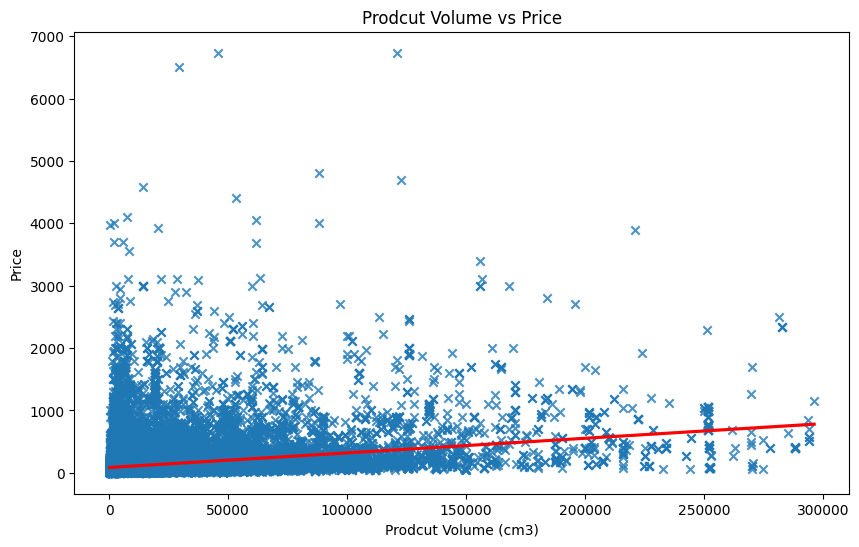

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='product_volume', y='price', data=orderitem_products_df, marker='x', line_kws=dict(color="r"))
plt.title('Prodcut Volume vs Price')
plt.xlabel('Prodcut Volume (cm3)')
plt.ylabel('Price')
plt.show()

**Insight :**
- Volume produk dan harga produk berkolerasi positif dimana jika produk mempunyai volume yang lebih besar, maka harganya juga akan lebih tinggi. Namun, baanyak transaksi yang berada di volume rendah dengan harga yang rendah pula. Untuk meningkatkan pendapatan dapat dengan cara menawarkan paket produk dengan volume yang lebih besar dengan harga yang lebih tinggi.

## Conclusion

- **Conclution pertanyaan 1:**
Jumlah order dan revenue mengalami peningnkatan drastis pada bulan tertentu. Hal tersebut mengindikasikan bahwa terdapat tren musiman. Setelah kenaikan secara drastis, kemudian akan mengalami penurunan secara signifikan juga. Hal ini harus menjadi bahan evaluasi. Tahun 2017 dan 2018 menunjukkan peningkatan pendapat dan penjualan daripada tahun 2016
- **Conclution pertanyaan 2 :**
Perlu diadakannya promosi yang lebih untuk mengangkat popularitas produk yang kurang laku
- **Conclution pertanyaan 3 :**
Jumlah customer sangat banyak namun hanya berpusat di state SP dan sekitarnya. Hal tersebut menunjukkan bahwa persebaran customer tidak terlalu merata.
- **Conclution pertanyaann 4,5,6 :**
Customer dengan recency yang tinggi perlu dilibatkan dalam kampanye pemasaran karena mereka adalah pelanggan paling aktif. Customer dengan frequency yang tinggi harus diberi penghargaan karena loyalitas mereka. Customer dengan monetary tertinggi dapat difokuskan untuk diberikan penawaran khusus atau produk premium
- **Conclution pertanyaan 7:**
Grafik tren positif menunjukkan bahwa platform ini mampu menarik penjual baru dan mempertahankan penjual lama.   

In [ ]:
from google.colab import files
order_payment_df.to_csv("order_payment_df.csv", index=False)
files.download('order_payment_df.csv')#q1

orderitem_products_df.to_csv("orderitem_products_df.csv", index=False)
files.download('orderitem_products_df.csv')#q2 n analisis lanjutan

customer_df.to_csv("customer_df.csv", index=False)
files.download('customer_df.csv')#q3



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
orderitems_orders_df.to_csv("orderitems_orders_df.csv", index=False)
files.download('orderitems_orders_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
orderpayment_ordercustomer_df.to_csv("orderpayment_ordercustomer_df.csv", index=False)
files.download('orderpayment_ordercustomer_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>